In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Lymp_after_LDA.csv')
dataset

,LDA1,LDA2,LDA3,class
0,1.843972,-0.518813,1.478109,3
1,0.468808,-0.941814,-0.073448,2
2,-1.787908,2.184318,0.451680,3
3,1.455623,2.277692,0.230391,3
4,0.863719,-0.610876,0.557740,2
5,1.207982,1.025168,-0.081585,2
6,1.168805,-1.208935,-0.050494,2
7,-0.622208,-0.760820,-2.022342,2
8,0.597017,0.694943,-0.466244,3
9,0.341687,0.938321,-1.240400,3


In [3]:
dataset.isnull().sum()
print(dataset.isnull().sum())

LDA1     0
LDA2     0
LDA3     0
class    0
dtype: int64


In [4]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

LDA1
LDA2
LDA3
class


In [5]:
X = dataset.iloc[:, 0:3].values
x = dataset.iloc[:, 0:3]
y = dataset.iloc[:, 3].values
y_name = dataset.iloc[:, 3:4]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (148, 3)
y shape: (148, 1)


In [6]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

LDA1
LDA2
LDA3


Class:
class


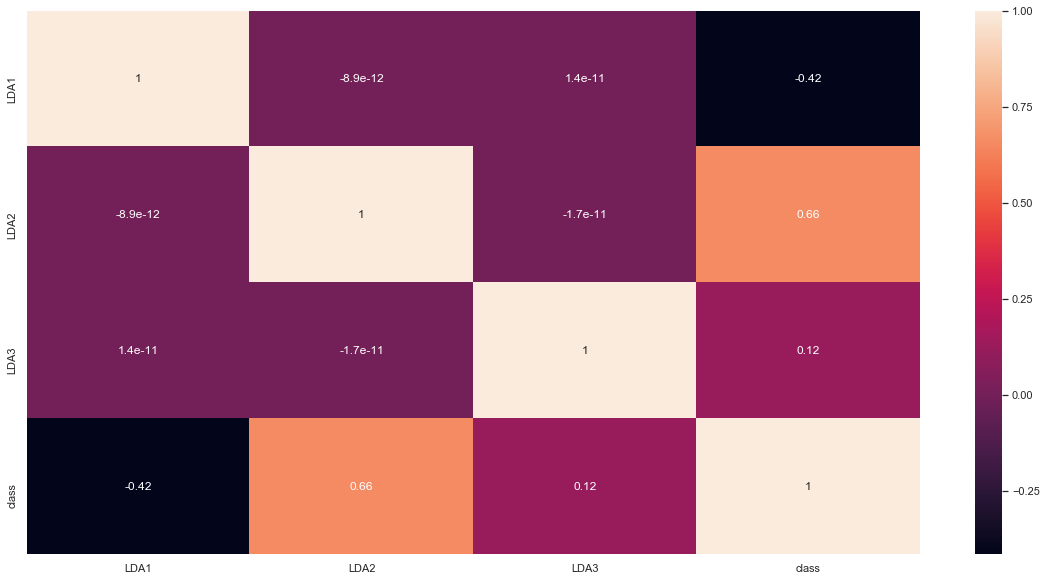

In [7]:
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

In [32]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [33]:
X_train
X_test

array([[ -5.29580926,  -1.86686521,   2.76324479],
       [  1.21782993,  -0.56554438,  -0.74550227],
       [  1.14241123,   0.29553844,   0.13528383],
       [  1.49325514,  -0.49535602,   1.81889276],
       [-16.20975924,   1.08005892,  -0.92067074],
       [  0.95908722,   1.08757564,   0.73119113],
       [  0.89216816,   1.87918747,   0.67108009],
       [  0.48760468,   2.19188997,  -0.1808275 ],
       [ -0.46730251,  -2.09165007,  -0.54949646],
       [ -0.14783314,   0.14627029,  -0.48356472],
       [  0.73298901,   0.06725223,   0.76091909],
       [  0.50190212,  -1.26194509,   0.75895375],
       [  0.34168713,   0.93832147,  -1.24040021],
       [  0.75855739,  -1.76173953,   0.68185935],
       [ -0.08562566,  -1.26749046,   0.2822855 ],
       [ -0.62220776,  -0.76082013,  -2.0223417 ],
       [  0.5729024 ,  -0.9652993 ,  -0.81499218],
       [  0.87279935,   0.53777868,  -1.58892569],
       [  1.04181974,  -2.07465972,   0.45524029],
       [  1.0517521 ,   2.29716

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')

In [49]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [50]:
y_pred_knn = classifier_knn.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)


[[23  1  0]
 [ 7 13  0]
 [ 0  1  0]]


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average='weighted')
re  = recall_score(y_test, y_pred_knn, average='weighted')
f1  = f1_score(y_test, y_pred_knn, average='weighted')
mc  = matthews_corrcoef(y_test, y_pred_knn)  

In [53]:
np.set_printoptions()
print("Akurasi =", ac)
print("Presisi =",pre)
print("Recall =", re)
print("F1 =", f1)
print("MCC =", mc)

Akurasi = 0.8
Presisi = 0.794074074074074
Recall = 0.8
F1 = 0.7844797178130511
MCC = 0.6178020632152155


In [54]:
print(ac)
print(pre)
print(re)
print(f1)
print(mc)

0.8
0.794074074074074
0.8
0.7844797178130511
0.6178020632152155


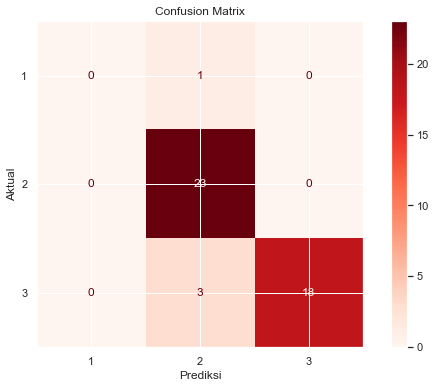

In [90]:
matrix = plot_confusion_matrix(classifier_knn, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.gcf().axes[0].tick_params
plt.gcf().axes[1].tick_params
plt.gcf().set_size_inches(10,6)
plt.show()

In [74]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [75]:
range(1, 40), error

(range(1, 40),
 [0.28888888888888886,
  0.17777777777777778,
  0.08888888888888889,
  0.1111111111111111,
  0.08888888888888889,
  0.13333333333333333,
  0.1111111111111111,
  0.13333333333333333,
  0.1111111111111111,
  0.13333333333333333,
  0.13333333333333333,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.08888888888888889,
  0.1111111111111111,
  0.08888888888888889,
  0.1111111111111111,
  0.08888888888888889,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.13333333333333333,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111,
  0.13333333333333333,
  0.1111111111111111,
  0.1111111111111111,
  0.1111111111111111])

Text(0, 0.5, 'Error rata-rata')

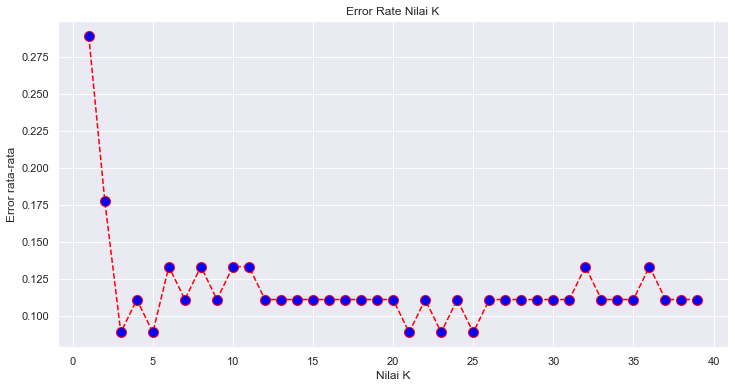

In [76]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')